So here I'll show all not working circle pictures from our machine learning model and also few working pictures

So lets import needed libs

In [2]:
import keras
import numpy as np
from numpy import argmax
from skimage import io
from scipy.misc import imresize

Lets load our trained model (with have problems only with some circles)

In [3]:
model = keras.models.load_model('shapes_model')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


And now lets load all test circle images and prepare them to fit into our model

In [4]:
test_size = 600
X_circles = np.zeros((test_size, 64, 64, 3))
directory = 'circles/test'
for file in range(test_size):
    img = io.imread('{}/{}.png'.format(directory, file+1))
    new_img = imresize(img, (64, 64, 3))
    X_circles[file] = np.array(new_img)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Then predict all our images

In [5]:
predictions = model.predict(X_circles)
fail = []
matched = []
counter = 0
for i in predictions:
    counter += 1
    if argmax(i) == 0:
        matched.append('{}/{}.png'.format(directory, counter))
    else:
        fail.append(['{}/{}.png'.format(directory, counter), i])


In [6]:
len(matched)

598

In [7]:
len(fail)

2

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Lets check our 2 failed predictions

In [9]:
argmax(fail[0][1]), argmax(fail[1][1])

(1, 1)

So 2 fails was predictions of rectangles not circles

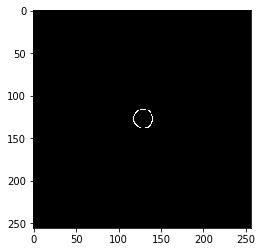

In [10]:
fail_one = mpimg.imread(fail[0][0])
plt.imshow(fail_one)
plt.show()

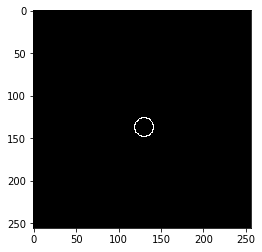

In [11]:
fail_two = mpimg.imread(fail[1][0])
plt.imshow(fail_two)
plt.show()

In [12]:
fail

[['circles/test/363.png',
  array([3.6648637e-01, 6.3349986e-01, 1.3791094e-05], dtype=float32)],
 ['circles/test/561.png',
  array([3.541514e-01, 6.458406e-01, 7.970925e-06], dtype=float32)]]

So lets see how this circle was seen by our model

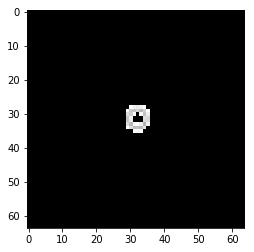

In [16]:
plt.imshow(X_circles[362])

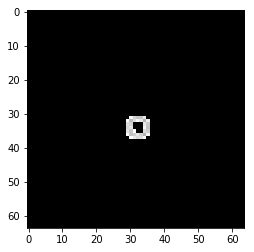

In [17]:
plt.imshow(X_circles[560])

So second image looks kinda like rectangle, now lets see how our model see some working circles

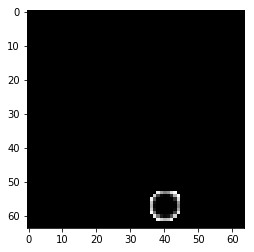

In [18]:
plt.imshow(X_circles[25])

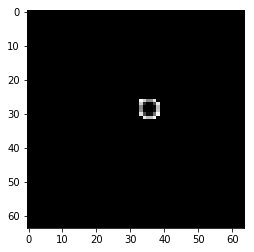

In [19]:
plt.imshow(X_circles[23])

And how they look in original

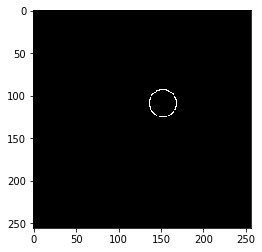

In [24]:
match = mpimg.imread(matched[24])
plt.imshow(match)
plt.show()

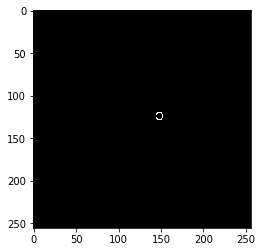

In [23]:
match_two = mpimg.imread(matched[22])
plt.imshow(match_two)
plt.show()

And thats all thanks for attention :P